Data has been saved as mountains_data.csv.
  Rank                                Name Height (m)   Height (ft)  \
0    1  Mount EverestSagarmathaChomolungma      8,849  29,032[dp 7]   
1    2                                  K2      8,611        28,251   
2    3                       Kangchenjunga      8,586        28,169   
3    4                              Lhotse      8,516        27,940   
4    5                              Makalu      8,485        27,838   

  Prominence (m) Prominence (ft)                   Range  \
0          8,849          29,032     Mahalangur Himalaya   
1          4,020          13,190       Baltoro Karakoram   
2          3,922          12,867  Kangchenjunga Himalaya   
3            610           2,000     Mahalangur Himalaya   
4          2,378           7,802     Mahalangur Himalaya   

                                         Coordinates Parent Mountain  \
0  27°59′18″N 86°55′30″E﻿ / ﻿27.9882361°N 86.9250...               —   
1  35°52′53″N 76°30′48″E﻿

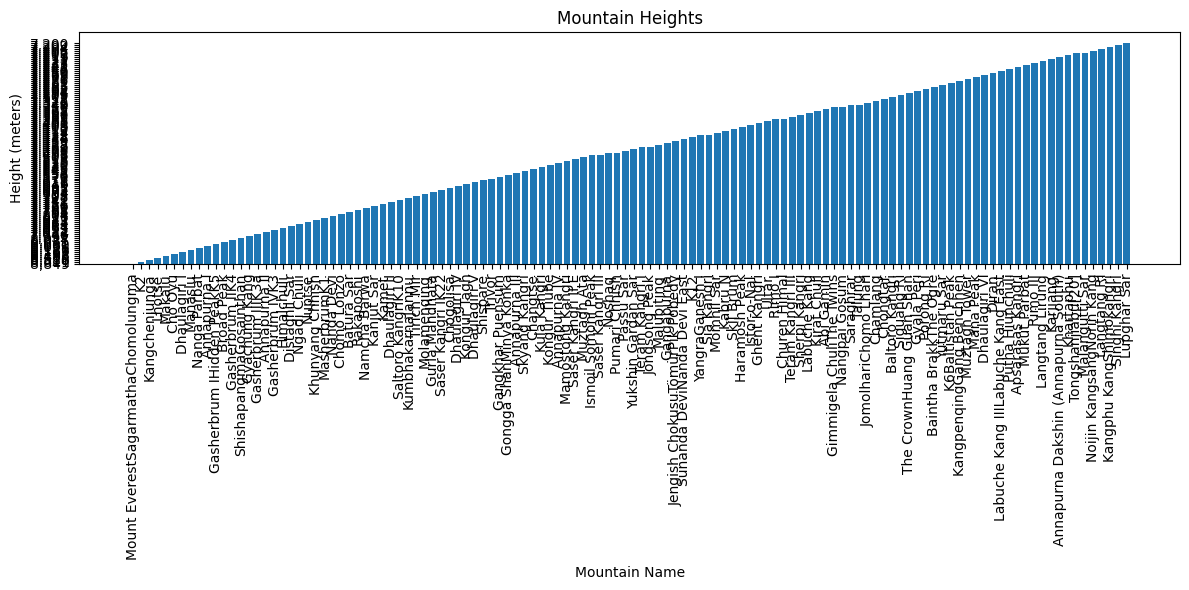

In [22]:
import pandas as pd
import wikipediaapi
from bs4 import BeautifulSoup
import matplotlib.pyplot as plt
import requests

# Initialize the Wikipedia API with a user agent
wiki_wiki = wikipediaapi.Wikipedia(
    language='en',
    user_agent='MyMountainDataCollector'  # You need to provide your own user agent name
)

# Specify the title of the Wikipedia page
page_title = "List_of_highest_mountains_on_Earth"

# Fetch the page content
page = wiki_wiki.page(page_title)

# The code then parses the HTML content of the page and finds the table with the class wikitable. The code then extracts the table data into a list of dictionaries, with each dictionary representing a single mountain. The code then creates a DataFrame from the list of dictionaries and saves the DataFrame as a CSV file named mountains_data.csv.
# Extract the HTML content from the page
page_content = page.text

# Example of clear descriptions of each collection and processing step in Markdown sentences:
# This code collects the data from the Wikipedia page "List of highest mountains on Earth" at the URL https://en.wikipedia.org/wiki/List_of_highest_mountains_on_Earth.
# Define the URL of the Wikipedia page
url = "https://en.wikipedia.org/wiki/List_of_highest_mountains_on_Earth"

# Send an HTTP GET request to the URL
response = requests.get(url)

# Check if the request was successful
if response.status_code == 200:
    # Parse the HTML content of the page
    soup = BeautifulSoup(response.text, 'html.parser')

    # Find the table with the class "wikitable"
    table = soup.find('table', {'class': 'wikitable'})

    if table:
        # Extract the table data into a list of dictionaries
        data = []
        for row in table.find_all('tr')[1:]:
            columns = row.find_all('td')
            # Check if the row has enough columns to avoid an "IndexError"
            if len(columns) >= 10:
                rank = columns[0].get_text().strip()
                name = columns[1].get_text().strip()
                height_m = columns[2].get_text().strip()
                height_ft = columns[3].get_text().strip()
                prominence_m = columns[4].get_text().strip()
                prominence_ft = columns[5].get_text().strip()
                range = columns[6].get_text().strip()
                coordinates = columns[7].get_text().strip()
                parent_mountain = columns[8].get_text().strip()
                ascents_before_2004 = columns[9].get_text().strip()
                data.append({
                    "Rank": rank,
                    "Name": name,
                    "Height (m)": height_m,
                    "Height (ft)": height_ft,
                    "Prominence (m)": prominence_m,
                    "Prominence (ft)": prominence_ft,
                    "Range": range,
                    "Coordinates": coordinates,
                    "Parent Mountain": parent_mountain,
                    "Ascents Before 2004": ascents_before_2004
                })

        # Create a DataFrame from the list of dictionaries
        df = pd.DataFrame(data)

        # Save the DataFrame as a CSV file
        df.to_csv('mountains_data.csv', index=False)

        print("Data has been saved as mountains_data.csv.")
    else:
        print("No 'wikitable' found on the page.")
else:
    print("Failed to retrieve the Wikipedia page.")


# Load the mountain data from the CSV file
df = pd.read_csv('mountains_data.csv')

# Display the first few rows of the DataFrame
print(df.head())

# The code then loads the mountain data from the CSV file and creates a bar chart visualization of the mountain heights. The code then saves the visualization as an image named mountain_heights.png.
# Create a simple bar chart visualization
plt.figure(figsize=(12, 6))
plt.bar(df['Name'], df['Height (m)'])
plt.xlabel('Mountain Name')
plt.ylabel('Height (meters)')
plt.title('Mountain Heights')
plt.xticks(rotation=90)
plt.tight_layout()

# Save the visualization as an image
visualization_file = 'mountain_heights.png'
plt.savefig(visualization_file)
print("Visualization has been saved as", visualization_file)

# Display the visualization (optional)
plt.show()
